# 1. Introduction

Welcome to your third assignment. In this assignment, you will build a deep neural network step by step. In this notebook, you will implement all the functions required to build a neural network.

After finishing this assignment, you will have a deeper understanding of the process of training a deep neural network, which only consists of three steps: forward propagation, backward propagation and update.

# 2. Important notice

## 2.1 Packages
All the packages that you need to finish this assignment are listed below.
*   numpy : the fundamental package for scientific computing with Python.
*   matplotlib : a comprehensive library for creating static, animated, and interactive visualizations in Python.
*   math : Python has a built-in module that you can use for mathematical tasks.
*   sklearn.metrics: we use this to compute the f1 score
*   from google.colab import drive: used to access data in your google drive

⚠️ **WARNING** ⚠️:
*   Please do not import any other packages.
*   np.random.seed(1) is used to keep all the random function calls consistent. It will help us grade your work. Please don't change the seed.

## 2.2 Todo
```
### START CODE HERE ### (≈ n lines of code)
...
### END CODE HERE ###
```
❗ **Important** ❗: Please do not change the code outside this code bracket in the first part.

### Common Notation
* $C$: number of classes
* $n$: number of samples
* $f^{[l]}$: the dimension of outputs in layer $l$, but $f^{[0]}$ is the input dimension
* $Z^{[l]} = A^{[l-1]}W^{[l]} + b^{[l]}$
    * $Z^{[l]}$: the output of layer $l$ in the shape $(n, f^{[l]})$
    * $A^{[l]}$: the activation of $Z^{[l]}$ in the shape $(n, f^{[l]})$, but $A^{[0]}$ is input $X$
    * $W^{[l]}$: the weight in layer $l$ in the shape $(f^{[l-1]}, f^{[l]})$
    * $b^{[l]}$: the bias in layer $l$ in the shape $(1, f^{[l]})$


In [320]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.metrics import f1_score

outputs = {}

# 3. Neural network
In this section, you will need to implement a deep neural network from scratch all by yourself. If you are familiar with deep learning library, such as Tensorflow or PyTorch, it may seems easy for you. But if you don't, don't worry because we will guide you step by step. All you need to do is to follow the instructions and understand how each part works.

As mentioned before, the process of training a deep neural network is composed of three steps: forward propagation, backward propagation, and update, so all the to-do in this section will be related to these three steps.

## 3.1 Implement a linear layer (10%)
First, we will start by implementing one of the most commonly used layers in the deep neural network, called the dense layer. The dense layer is a linear layer applying a linear transformation to the incoming data:
$Z = AW + b$, where $W$ and $b$ are the weight and bias.

**Note**: Dense layers, also known as Fully-connected layers, connect every input neuron to every output neuron and are commonly used in neural networks.


In [321]:
class Dense():
    def __init__(self, n_x, n_y, seed=1):
        self.n_x = n_x
        self.n_y = n_y
        self.seed = seed
        self.initialize_parameters()

    def initialize_parameters(self):
        """
        Argument:
        self.n_x -- size of the input layer
        self.n_y -- size of the output layer
        self.parameters -- python dictionary containing your parameters:
                           W -- weight matrix of shape (n_x, n_y)
                           b -- bias vector of shape (1, n_y)
        """
        sd = np.sqrt(6.0 / (self.n_x + self.n_y))
        np.random.seed(self.seed)
        W = np.random.uniform(-sd, sd, (self.n_y, self.n_x)).T      # the transpose here is just for the code to be compatible with the old codes
        b = np.zeros((1, self.n_y))

        assert(W.shape == (self.n_x, self.n_y))
        assert(b.shape == (1, self.n_y))

        self.parameters = {"W": W, "b": b}

    def forward(self, A):
        """
        Implement the linear part of a layer's forward propagation.

        Arguments:
        A -- activations from previous layer (or input data) with the shape (n, f^[l-1])
        self.cache -- a python tuple containing "A", "W" and "b" ; stored for computing the backward pass efficiently

        Returns:
        Z -- the input of the activation function, also called pre-activation parameter with the shape (n, f^[l])
        """

        # GRADED FUNCTION: linear_forward
        ### START CODE HERE ### (≈ 2 line of code)
        Z = np.matmul(A,self.parameters["W"])+np.tile(self.parameters["b"],(A.shape[0],1))
        self.cache = (A,self.parameters["W"],self.parameters["b"])
        ### END CODE HERE ###

        assert(Z.shape == (A.shape[0], self.parameters["W"].shape[1]))

        return Z

    def backward(self, dZ):
        """
        Implement the linear portion of backward propagation for a single layer (layer l)

        Arguments:
        dZ -- Gradient of the loss with respect to the linear output (of current layer l), same shape as Z
        self.cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer
        self.dW -- Gradient of the loss with respect to W (current layer l), same shape as W
        self.db -- Gradient of the loss with respect to b (current layer l), same shape as b

        Returns:
        dA_prev -- Gradient of the loss with respect to the activation (of the previous layer l-1), same shape as A_prev

        """
        A_prev, W, b = self.cache
        m = A_prev.shape[0]

        # GRADED FUNCTION: linear_backward
        ### START CODE HERE ### (≈ 3 lines of code)
        self.dW = np.matmul(np.transpose(A_prev),dZ)/m
        self.db = np.matmul(np.ones((1,m)),dZ)/m
        dA_prev = np.matmul(dZ,np.transpose(W))
        ### END CODE HERE ###

        assert (dA_prev.shape == A_prev.shape)
        assert (self.dW.shape == self.parameters["W"].shape)
        assert (self.db.shape == self.parameters["b"].shape)

        return dA_prev

    def update(self, learning_rate):
        """
        Update parameters using gradient descent

        Arguments:
        learning rate -- step size
        """

        # GRADED FUNCTION: linear_update_parameters
        ### START CODE HERE ### (≈ 2 lines of code)
        self.parameters["W"] = self.parameters["W"] - learning_rate*self.dW
        self.parameters["b"] = self.parameters["b"] - learning_rate*self.db
        ### END CODE HERE ###


### 3.1.1. Initialize parameters (0%)
*   You don't need to write this part.
*   We use random initialization (uniform distribution) for the weight matrices. Draws samples from a uniform distribution within $[\text{-limit}, \text{limit}]$, where $\text{limit} = \sqrt{\frac{6}{\text{fan_in} + \text{fan_out}}}$ (fan_in is the number of input units in the weight tensor and fan_out is the number of output units).
*   Use zero initialization for the biases.

In [322]:
dense = Dense(3, 1)
print("W = " + str(dense.parameters["W"]))
print("b = " + str(dense.parameters["b"]))

W = [[-0.20325375]
 [ 0.53968259]
 [-1.22446471]]
b = [[0.]]


Expected output:
<table>
  <tr>
    <td>W: </td>
    <td>[[-0.20325375]  [0.53968259 [-1.22446471]]</td>
  </tr>
  <tr>
    <td>b: </td>
    <td>[[0.]]</td>
  </tr>
</table>

### 3.1.2. Linear forward (4%)

After initializing parameters, you will need to apply the linear transformation to the incoming data, and this can be simply done by matrix multiplication and addition.

**Exercise**: Implement linear forward by applying the linear transformation. (5%)

In [323]:
A, W, b = np.array([[0., 1., 2.], [0.5, 1.5, 2.5], [1., 2., 3.]]), np.array([[0.1], [0.2], [0.3]]), np.array([[1.1]])
dense = Dense(3, 1)
dense.parameters = {"W": W, "b": b}
Z = dense.forward(A)
print("Z = " + str(Z))

A, W, b = np.array([[-0.80,-0.45,-1.11],[-1.65,-2.36,1.14],[-1.02,0.64,-0.86]]), np.array([[0.3], [0.3], [0.1]]), np.array([[-6.2]])
dense = Dense(3, 1)
dense.parameters = {"W": W, "b": b}
Z = dense.forward(A)
outputs["linear_forward"] = (Z, dense.cache)

Z = [[1.9]
 [2.2]
 [2.5]]


Expected output:
<table>
  <tr>
    <td>Z: </td>
    <td>[[1.9] [2.2] [2.5]]</td>
  </tr>
</table>

### 3.1.3. Linear backward (4%)
Backpropagation is used to calculate the gradient of the loss function with respect to the parameters.

For layer $l$, the linear part is: $Z^{[l]} = A^{[l-1]} W^{[l]} + b^{[l]}$ (followed by an activation).

Suppose you have already calculated the derivative $dZ^{[l]} = \frac{\partial \mathcal{L} }{\partial Z^{[l]}}$. You want to get $(dW^{[l]}, db^{[l]}, dA^{[l-1]})$.

The three outputs $(dW^{[l]}, db^{[l]}, dA^{[l-1]})$ are computed using the input $dZ^{[l]}$.

Here are the formulas you need:
$$ dW^{[l]} = \frac{\partial \mathcal{L} }{\partial W^{[l]}} = \frac{1}{m} A^{[l-1] T} dZ^{[l]}$$
$$ db^{[l]} = \frac{\partial \mathcal{L} }{\partial b^{[l]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[l](i)} $$
$$ dA^{[l-1]} = \frac{\partial \mathcal{L} }{\partial A^{[l-1]}} = dZ^{[l]} W^{[l] T}$$

**Exercise**: Use the 3 formulas above to implement `linear_backward()`.

In [324]:
dZ, linear_cache = np.array([[1.5, 0.5], [2.5, 1.]]), (np.array([[0.5], [1]]), np.array([[2., 1.0]]), np.array([[0.5, 1.]]))
dense = Dense(1, 2)
dense.cache = linear_cache
dA_prev = dense.backward(dZ)
print ("dA_prev = " + str(dA_prev))
print ("dW = " + str(dense.dW))
print ("db = " + str(dense.db))

dZ, linear_cache = np.array([[0.52,0.34],[0.76,0.89]]), (np.array([[0.42], [0.68]]), np.array([[0.35, 0.89]]), np.array([[0.12, 0.76]]))
dense = Dense(1, 2)
dense.cache = linear_cache
dA_prev = dense.backward(dZ)
outputs["linear_backward"] = (dA_prev, dense.dW, dense.db)

dA_prev = [[3.5]
 [6. ]]
dW = [[1.625 0.625]]
db = [[2.   0.75]]


Expected output:
<table>
  <tr>
    <td>dA_prev: </td>
    <td>[[3.5] [6.0]]</td>
  </tr>
  <tr>
    <td>dW: </td>
    <td>[[1.625 0.625]]</td>
  </tr>
  <tr>
    <td>db: </td>
    <td>[[2.0 0.75]]</td>
  </tr>
</table>


### 3.1.4. Linear update parameters (2%)
In this section you will update the parameters of the linear layer, using gradient descent:

$$ W^{[l]} = W^{[l]} - \alpha \text{ } dW^{[l]} $$$$ b^{[l]} = b^{[l]} - \alpha \text{ } db^{[l]} $$

**Exercise**: Implement update() to update your parameters using gradient descent.

**Instructions**:
*   Update parameters using gradient descent on $W^{[l]}$ and $b^{[l]}$.


In [325]:
np.random.seed(1)
dense = Dense(1, 2)
dense.parameters = {"W": np.array([[1.0, 2.0]]), "b": np.array([[0.5, 0.5]])}
dense.dW = np.array([[0.5, -0.5]])
dense.db = np.array([[1.5, -1.5]])
dense.update(1.0)
print("W = " + str(dense.parameters["W"]))
print("b = " + str(dense.parameters["b"]))

np.random.seed(1)
dense = Dense(3, 4)
parameters, grads = {"W1": np.random.rand(3, 4), "b1": np.random.rand(1,4)}, {"dW1": np.random.rand(3, 4), "db1": np.random.rand(1,4)}
dense.parameters = {"W": parameters["W1"], "b": parameters["b1"]}
dense.dW = grads["dW1"]
dense.db = grads["db1"]
dense.update(0.1)
outputs["linear_update_parameters"] = {"W": dense.parameters["W"], "b": dense.parameters["b"]}

W = [[0.5 2.5]]
b = [[-1.  2.]]


Expected output:
<table>
  <tr>
    <td>W1: </td>
    <td>[[0.5 2.5]]</td>
  </tr>
  <tr>
    <td>b1: </td>
    <td>[[-1.  2.]]</td>
  </tr>
</table>

## 3.2. Activation function layer (25%)

In this section, you will need to implement activation function layers. There are many activation functions, such as sigmoid function, softmax function, ReLU function and etc.



In [326]:
class Activation():
    def __init__(self, activation_function, loss_function, alpha=None, gamma=None):
        self.activation_function = activation_function
        self.loss_function = loss_function
        self.alpha = alpha
        self.gamma = gamma

    def forward(self, Z):
        if self.activation_function == "sigmoid":
            """
            Implements the sigmoid activation in numpy

            Arguments:
            Z -- numpy array of any shape
            self.cache -- stores Z as well, useful during backpropagation

            Returns:
            A -- output of sigmoid(z), same shape as Z
            """

            # GRADED FUNCTION: sigmoid_forward
            ### START CODE HERE ### (≈ 8 lines of code)
            e_nZ=np.exp(-Z)
            e_Z=np.exp(Z)
            A = np.where(Z<0, e_Z/(1+e_Z), 1/(1+e_nZ))#makes enZ/eZ small instead of huge and overfloor
            self.cache = Z
            ### END CODE HERE ###

            return A
        elif self.activation_function == "relu":
            """
            Implement the RELU function in numpy
            Arguments:
            Z -- numpy array of any shape
            self.cache -- stores Z as well, useful during backpropagation
            Returns:
            A -- output of relu(z), same shape as Z

            """

            # GRADED FUNCTION: relu_forward
            ### START CODE HERE ### (≈ 2 lines of code)
            A = np.where(Z<0, 0, Z)
            self.cache = Z
            ### END CODE HERE ###

            assert(A.shape == Z.shape)

            return A
        elif self.activation_function == "softmax":
            """
            Implements the softmax activation in numpy

            Arguments:
            Z -- np.array with shape (n, C)
            self.cache -- stores Z as well, useful during backpropagation

            Returns:
            A -- output of softmax(z), same shape as Z
            """

            # GRADED FUNCTION: softmax_forward
            ### START CODE HERE ### (≈ 3 lines of code)
            b = np.expand_dims(np.amax(Z,axis=1),axis=1)
            e_Zmb = np.exp(Z-b)
            A = e_Zmb/np.expand_dims(np.sum(e_Zmb, axis=1),axis=1)
            self.cache = Z
            ### END CODE HERE ###

            return A
        else:
            assert 0, f"you're using undefined activation function {self.activation_function}"


    def backward(self, dA=None, Y=None):
        if self.activation_function == "sigmoid":
            """
            Implement the backward propagation for a single SIGMOID unit.
            Arguments:
            dA -- post-activation gradient, of any shape
            self.cache -- 'Z' where we store for computing backward propagation efficiently
            Returns:
            dZ -- Gradient of the loss with respect to Z
            """

            # GRADED FUNCTION: sigmoid_backward
            ### START CODE HERE ### (≈ 9 lines of code)
            Z = self.cache
            A = self.forward(Z)
            dZ = dA*(A*(1-A))
            ### END CODE HERE ###

            assert (dZ.shape == Z.shape)

            return dZ

        elif self.activation_function == "relu":
            """
            Implement the backward propagation for a single RELU unit.
            Arguments:
            dA -- post-activation gradient, of any shape
            self.cache -- 'Z' where we store for computing backward propagation efficiently
            Returns:
            dZ -- Gradient of the loss with respect to Z
            """

            # GRADED FUNCTION: relu_backward
            ### START CODE HERE ### (≈ 3 lines of code)
            Z = self.cache
            dZ = np.where(Z<=0, 0, dA)
            ### END CODE HERE ###

            assert (dZ.shape == Z.shape)

            return dZ

        elif self.activation_function == "softmax" and self.loss_function == 'cross_entropy':
            """
            Implement the backward propagation for a [SOFTMAX->CCE LOSS] unit.
            Arguments:
            Y -- true "label" vector (one hot vector, for example: [1,0,0] represents rock, [0,1,0] represents paper, [0,0,1] represents scissors
                                      in a Rock-Paper-Scissors, shape: (n, C)
            self.cache -- 'Z' where we store for computing backward propagation efficiently
            Returns:
            dZ -- Gradient of the cost with respect to Z
            """

            # GRADED FUNCTION: softmax_CCE_backward
            ### START CODE HERE ### (≈ 3 lines of code)
            Z = self.cache
            s = self.forward(Z)
            dZ = s-Y
            ### END CODE HERE ###

            assert (dZ.shape == self.cache.shape)

            return dZ
        elif self.activation_function == "softmax" and self.loss_function == 'focal_loss':
            """
            Implement the backward propagation for a [SOFTMAX->FOCAL LOSS] unit.
            Arguments:
            Y -- true "label" vector (one hot vector, for example: [1,0,0] represents rock, [0,1,0] represents paper, [0,0,1] represents scissors
                                      in a Rock-Paper-Scissors, shape: (n, C)
            self.cache -- 'Z' where we store for computing backward propagation efficiently
            Returns:
            dZ -- Gradient of the cost with respect to Z
            alpha -- weighting factors correspond to each class, shape: (C,)
            gamma -- modulating factor, a float
            """

            # GRADED FUNCTION: softmax_focalLoss_backward
            ## START CODE HERE ### (≈ 10 lines of code)
            Z = self.cache
            P = self.forward(Z)
            alpha_t = Y@self.alpha.reshape(self.alpha.shape[0],1)
            P_it = np.diagonal(Y@P.T).reshape(Y.shape[0],1)
            dZ_jet  = alpha_t*(self.gamma*np.power(1-P_it,self.gamma-1)*np.log(P_it+0.00001)*(P_it-P_it*P_it)-np.power(1-P_it,self.gamma)*(1-P_it))
            dZ_jnet = alpha_t*(self.gamma*np.power(1-P_it,self.gamma-1)*np.log(P_it+0.00001)*(-P*P_it)-np.power(1-P_it,self.gamma)*(-P))
            Y_ = np.where(Y==0,1,0)
            dZ = dZ_jet*Y+dZ_jnet*Y_
            ## END CODE HERE ###

            assert (dZ.shape == self.cache.shape)

            return dZ

### 3.2.1. Activation forward (10%)
#### 3.2.1.1. Sigmoid function
Sigmoid: $\sigma(Z) = \begin{cases}
    \frac{1}{1+e^{-Z}},& \text{if } Z >= 0\\
    \frac{e^{Z}}{1+e^{Z}}, & \text{otherwise}
\end{cases}$.

❗**Important**❗: As you can see, there is an exponential function inside the sigmoid function, so you might encounter an exponential overflow problem when implementing this function. To solve this problem, we use the numerically stable sigmoid function as shown in the equation above.

### 3.2.1.2. Softmax function
Softmax: $\sigma(\vec{Z})_i = \frac{e^{Z_i-b}}{\sum_{j=1}^{C} e^{Z_j-b}}$, where $\vec{Z}$ = input vector, $C$ = number of classes in the multi-class classifier, $b$ is $\max_{j=1}^{C} Z_j$

❗**Important**❗: The naive implementation $\sigma(\vec{Z})_i = \frac{e^{Z_i}}{\sum_{j=1}^{C} e^{Z_j}}$ is terrible when there are large numbers! You might encounter the following problems if you use the naive implementation.
*   RuntimeWarning: overflow encountered in exp


### 3.2.1.3. ReLU (rectified linear unit) function
ReLU: $RELU(Z) = max(Z, 0)$

**Exercise**: Implement activation function. (5% + 5%) (basic: Sigmoid and ReLU, advanced: Softmax)

**Instruction**:
*   Sigmoid: This function returns one item and stores one item: the activation value "a" and a cache contains "z" (it's what we will use in to the corresponding backward function).
*   Softmax: This function returns one item and stores one item: the activation value "a" and a cache contains "z" (it's what we will use in to the corresponding backward function).
*   ReLU: This function returns one item and stores one item: the activation value "a" and a cache contains "z" (it's what we will use in to the corresponding backward function).

In [327]:
Z = np.array([[-5], [-1], [0], [1], [5]])

sigmoid = Activation("sigmoid", 'cross_entropy')
A = sigmoid.forward(Z)
print("Sigmoid: A = " + str(A))
A = sigmoid.forward(np.array([[0.23], [-0.67], [0.45], [0.89], [-0.10]]))
outputs["sigmoid"] = (A, sigmoid.cache)

relu = Activation("relu", 'cross_entropy')
A = relu.forward(Z)
print("ReLU: A = " + str(A))
A = relu.forward(np.array([[-0.34], [-0.76], [0.21], [-0.98], [0.54]]))
outputs["relu"] = (A, relu.cache)

Z = np.array([[1, 2, 3, 4],[0, 1, 0, 0],[-2, -1, 0, 1]])
softmax = Activation("softmax", 'cross_entropy')
A = softmax.forward(Z)
print("Softmax: A = \n" + str(A))
A = softmax.forward(np.array([[0.12, -0.56, 0.78, -0.34], [0.45, 0.67, -0.89, 0.23], [-0.14, 0.50, -0.76, 0.98]]))
outputs["softmax"] = (A, softmax.cache)

Sigmoid: A = [[0.00669285]
 [0.26894142]
 [0.5       ]
 [0.73105858]
 [0.99330715]]
ReLU: A = [[0]
 [0]
 [0]
 [1]
 [5]]
Softmax: A = 
[[0.0320586  0.08714432 0.23688282 0.64391426]
 [0.1748777  0.47536689 0.1748777  0.1748777 ]
 [0.0320586  0.08714432 0.23688282 0.64391426]]


Expected output:
<table>
  <tr>
    <td>Sigmoid: A</td>
    <td>[[0.00669285] [0.26894142] [0.5] [0.73105858] [0.99330715]]</td>
  </tr>
  <tr>
    <td>ReLU: A</td>
    <td>[[0] [0] [0] [1] [5]]</td>
  </tr>
  <tr>
    <td>Softmax: A</td>
    <td>
      [[0.0320586 0.08714432 0.23688282 0.64391426]
       [0.1748777 0.47536689 0.1748777 0.1748777]
       [0.0320586 0.08714432 0.23688282 0.64391426]]
    </td>
  </tr>
</table>

### 3.2.2. Activation backward (15%)
Next, you will need to implement the backward functions of `sigmoid()`, `relu()`, `softmax()`+`compute_CCE_loss` and `softmax()`+`compute_focal_loss`.

**Exercise**: Implement backward function. (5% + 10%) (basic: Sigmoid and ReLU, advanced: Softmax+CCE_loss, Softmax+Focal_loss)

**Instruction**:
*   sigmoid_backward: Implements the backward propagation for SIGMOID unit.
*   relu_backward: Implements the backward propagation for RELU unit.
*   softmax_CCE_backward: Implements the backward propagation for [SOFTMAX->CCE_LOSS] unit.
*   softmax_focal_backward: Implements the backward propagation for [SOFTMAX->Focal_LOSS] unit.

If $g(.)$ is the activation function, sigmoid_backward, relu_backward and softmax_backward compute$$dZ^{[l]} = dA^{[l]} * g'(Z^{[l]})$$

1. The derivative of the sigmoid function is: $$σ^{'}(Z^{[l]}) = σ(Z^{[l]}) (1 - σ(Z^{[l]}))$$. <br>
❗**Important**❗: You should use the numerically stable sigmoid function to prevent the overflow exponential problem.

2. The derivative of the relu function is: $$g'(Z^{[l]}) = \begin{cases}
    1,& \text{if } Z^{[l]}> 0\\
    0,              & \text{otherwise}
\end{cases}$$

3. TLDR😉: The derivative of the softmax + categorical cross-entropy loss with respect to the last hidden layer is: $$\frac{\partial \mathcal{L}}{\partial Z} = s - y $$. <br> The derivative of the softmax function is: $$\frac{\partial S(z_i)}{\partial z_j} = \begin{cases}
    S(z_i) \times (1 - S(z_i)),& \text{if } i = j\\
    -S(z_i) \times S(z_j),              & \text{if } i \neq j
\end{cases}$$, where $z$ is a vector with shape (number of classes K, 1) and $S(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}}$. Hence, the real derivative of softmax function would be a full Jacobian matrix. For the special case, K = 4, we have <img src="https://miro.medium.com/max/554/1*SWfgFQLDIPXDf1C6CHmr8A.png" height="100"/>. <br> It is quite complicated to calculate the softmax derivative on its own. However, if you use the softmax and the cross entropy loss, that complexity fades away. Since the softmax layer is usually used at the output, we can actually calculate the derivative of the categorical cross-entropy loss with respect to the n-th node in the last hidden layer. Instead of a long clunky formula, you end up with this terse, easy to compute thing: $$\frac{\partial \mathcal{L}}{\partial Z_i} = s_i - y_i $$, where $s$ is the output of the softmax function and the $y$ is the true label vector(one-hot vector). For more information, you can refer to this article [Derivative of the Softmax Function and the Categorical Cross-Entropy Loss](https://towardsdatascience.com/derivative-of-the-softmax-function-and-the-categorical-cross-entropy-loss-ffceefc081d1). <br>
❗**Important**❗: The above mathematical derivation is based on naive implementation. In order to deal with the exponential overflow problem, we should use the normalized exponential function when counting $s$. For the sake of simplicity, we just use the same gradient equation as the naive implementation.

4. The derivative of the softmax + Focal loss with respect to the last hidden layer can be written **elementwisely** in the following form:
$$
\begin{equation}
\frac{\partial \mathcal{L}}{\partial Z_{ij}} =
\left\{
\begin{array}{ll}
\alpha_{t} (\gamma(1 - p_{it})^{\gamma-1} \cdot (\log p_{it}) \cdot (p_{it} - p_{it}^2) - (1 - p_{it})^\gamma \cdot (1 - p_{it})), & j = t \\
\alpha_{t} (\gamma(1 - p_{it})^{\gamma-1} \cdot (\log p_{it}) \cdot (-p_{ij} \cdot p_{it}) - (1 - p_{it})^\gamma \cdot (-p_{ij})), & j \neq t
\end{array}
\right.
\end{equation}
$$, where
* $p$: $a^{[l]}$, that is, the softmax of the $Z^{[l]}$
* $p_{ij}$: for the $i$th example, the predicted probability for the $j$th class
* $p_{it}$: for the $i$th example, the predicted probability of the true label. (eg. Suppose a predicted probability for the $i$th example in 3-class classification is $[0.1, 0.4, 0.5]$ and the true label is $[0, 1, 0]$, then the $p_{it}$ is $0.4$)
* $\alpha_{t}$: the $\alpha$ correspond to the true label. (eg. With the above example, if your $\alpha$ is $[1,2,3]$, then $\alpha_{t} = 2$)
* $\gamma$: the modulating factor, a float
    
   ❗**Important**❗:
    * You should add $\epsilon = 1e-5$ in each $log$.
    * You can try to implement it in matrix form to speed it up!


In [328]:
dA, cache = np.array([[-2], [-1.37], [-1.14], [-2], [-3.72]]), np.array([[0], [1], [2], [0], [1]])
sigmoid = Activation("sigmoid", 'cross_entropy')
sigmoid.cache = cache
dZ = sigmoid.backward(dA=dA)
print("Sigmoid: dZ = "+ str(dZ))
dA, cache = np.array([[9.73], [-7.56], [8.34], [-4.12], [6.89]]), np.array([[-5.45], [3.68], [-2.32], [4.51], [-9.27]])
sigmoid.cache = cache
outputs["sigmoid_backward"] = sigmoid.backward(dA=dA)

relu = Activation("relu", 'cross_entropy')
dA, cache = np.array([[-2., 1.7 ], [-1.37, 2.], [-1.14, 3.72]]), np.array([[-2, 1], [-1, 0], [2, 1]])
relu.cache = cache
dZ = relu.backward(dA=dA)
print("ReLU: dZ = "+ str(dZ))
dA, cache = np.array([[7.24, -3.58], [8.93, 6.45], [-2.11, 9.87]]), np.array([[-4.76, 5.34], [1.98, -7.22], [3.67, -8.56]])
relu.cache = cache
outputs["relu_backward"] = relu.backward(dA=dA)

Y, cache = np.array([[1, 0, 0],[0, 1, 0],[0, 0, 1]]), np.array([[-2, 1, 0],[-1, 0, 1],[-2, -2, 2]])
softmax = Activation("softmax", 'cross_entropy')
softmax.cache = cache
dZ = softmax.backward(Y=Y)
print("SoftmaxCCE: dZ = " + str(dZ))
Y, cache = np.array([[0, 1, 0], [0, 1, 0], [1, 0, 0]]), np.array([[-9.45, 7.32, 3.58], [5.61, -8.27, 6.49], [1.23, -4.56, 7.84]])
softmax.cache = cache
outputs["softmax_CCE_backward"] = softmax.backward(Y=Y)

Y, cache, alpha, gamma = np.array([[1, 0, 0],[0, 1, 0],[0, 0, 1]]), np.array([[-2, 1, 0],[-1, 0, 1],[-2, -2, 2]]), np.array([1,2,3]), 2.
softmax = Activation("softmax", 'focal_loss', alpha, gamma)
softmax.cache = cache
dZ = softmax.backward(Y=Y)
print("SoftmaxFocal: dZ = " + str(dZ))
Y, cache, alpha, gamma = np.array([[0, 1, 0], [1, 0, 0], [0, 0, 1]]), np.array([[-6.39, 8.20, -1.54], [5.61, -3.78, 7.32], [-4.56, 9.87, -2.68]]), np.array([0.1,0.2,0.5]), 5
softmax.cache = cache
outputs["softmax_Focal_backward"] = softmax.backward(Y=Y)

Sigmoid: dZ = [[-0.5       ]
 [-0.26935835]
 [-0.11969269]
 [-0.5       ]
 [-0.73139639]]
ReLU: dZ = [[ 0.    1.7 ]
 [ 0.    0.  ]
 [-1.14  3.72]]
SoftmaxCCE: dZ = [[-0.96488097  0.70538451  0.25949646]
 [ 0.09003057 -0.75527153  0.66524096]
 [ 0.01766842  0.01766842 -0.03533684]]
SoftmaxFocal: dZ = [[-1.11727728e+00  8.16795141e-01  3.00482140e-01]
 [ 1.96405971e-01 -1.64766071e+00  1.45125474e+00]
 [ 1.96157485e-04  1.96157485e-04 -3.92314970e-04]]


Expected output:
<table>
  <tr>
    <td>(with Sigmoid) dZ</td>
    <td>[[-0.5] [-0.26935835] [-0.11969269] [-0.5] [-0.73139639]]</td>
  </tr>
  <tr>
    <td>(with ReLU) dZ</td>
    <td>[[0 1.7] [0 0] [-1.14 3.72]]</td>
  </tr>
  <tr>
    <td>(with SoftmaxCCE) dZ</td>
    <td>
      [[-0.96488097 0.70538451 0.25949646]
       [0.09003057 -0.75527153 0.66524096]
       [0.01766842 0.01766842 -0.03533684]]
    </td>
  </tr>
  <tr>
    <td>(with SoftmaxFocal) dZ</td>
    <td>
      [[-1.11727728e+00 8.16795141e-01 3.00482140e-01]
       [1.96405971e-01 -1.64766071e+00 1.45125474e+00]
       [1.96157485e-04 1.96157485e-04 -3.92314970e-04]]
    </td>
  </tr>
</table>

## 3.3. Model (10%)
Alright, now you have all the tools that are needed to build a model. Let's get started! 😀



In [329]:
class Model():
    def __init__(self, units, activation_functions, loss_function, alpha=None, gamma=None):
        self.units = units
        self.activation_functions = activation_functions
        self.loss_function = loss_function
        self.alpha = alpha
        self.gamma = gamma
        self.initialize_parameters()

    def initialize_parameters(self):
        """
        Arguments:
        self.units -- number of nodes/units for each layer, starting from the input dimension and ending with the output dimension (i.e., [4, 4, 1])
        self.activation_functions -- activation functions used in each layer (i.e, ["relu", "sigmoid"])
        self.loss_function -- ["cross_entropy", "focal_loss"]
        self.alpha -- weighting factors used by focal loss correspond to each class, shape: (C,)
        self.gamma -- a float, used by focal loss
        """
        self.linear = []        # a list to store the dense layers when initializing the model
        self.activation = []    # a list to store the activation function layers when initializing the model

        for i in range(len(self.units)-1):
            dense = Dense(self.units[i], self.units[i+1], i)
            self.linear.append(dense)

        for i in range(len(self.activation_functions)):
            self.activation.append(Activation(self.activation_functions[i], self.loss_function, self.alpha, self.gamma))

    def forward(self, X):
        """
        Arguments:
        X -- input data: shape (n, f)

        Returns:
        A -- output of L-layer neural network, probability vector corresponding to your label predictions, shape (n, C)
        """
        A = X

        # GRADED FUNCTION: model_forward
        ### START CODE HERE ### (≈ 4 lines of code)
        
        for i in range(len(self.units)-1):
            Z = self.linear[i].forward(A)
            A = self.activation[i].forward(Z)
            
        ### END CODE HERE ###

        return A

    def backward(self, AL=None, Y=None):
        """
        Arguments:
        For multi-class classification,
        AL -- output of L-layer neural network, probability vector corresponding to your label predictions, shape (n, C)
        Y -- true "label" vector (one hot vector, for example: [1,0,0] represents rock, [0,1,0] represents paper, [0,0,1] represents scissors
                                      in a Rock-Paper-Scissors, shape: (n, C)

        Returns:
        dA_prev -- post-activation gradient
        """

        L = len(self.linear)
        C = Y.shape[1]

        # assertions
        warning = 'Warning: only the following 4 combinations are allowed! \n \
                    1. binary classification: sigmoid + cross_entropy) \n \
                    2. binary classification: softmax + focal_loss) \n \
                    3. multi-class classification: softmax + cross_entropy) \n \
                    4. multi-class classification: softmax + focal_loss)'
        assert self.loss_function in ["cross_entropy", "focal_loss"], "you're using undefined loss function!"
        if Y.shape[1] <= 2:                                 # in binary classification
            if self.loss_function == "cross_entropy":
                assert self.activation_functions[-1] == 'sigmoid', warning
                assert self.units[-1] == 1, "you should set last dim to 1 when using sigmoid + cross_entropy in binary classification!"
            elif self.loss_function  == "focal_loss":
                assert self.activation_functions[-1] == 'softmax', warning
                assert self.units[-1] == 2, "you should set last dim to 2 when using softmax + focal_loss in binary classification!"
        else:                                               # in multi-class classification
            assert self.activation_functions[-1] == 'softmax', warning
            assert self.units[-1] == Y.shape[1], f"you should set last dim to {Y.shape[1]}(the number of classes) in multi-class classification!"

        # GRADED FUNCTION: model_backward
        ### START CODE HERE ### (≈ 20 lines of code)

        if self.activation_functions[-1] == "sigmoid":
            if self.loss_function == 'cross_entropy':
                # Initializing the backpropagation
                dAL = - (np.divide(Y, AL + 0.00001) - np.divide(1 - Y, 1 - AL + 0.00001)) # derivative of loss with respect to AL, where ϵ = 1e-5 is added to prevent zero division.

                # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "dAL". Outputs: "dA_prev"
                dZ = self.activation[-1].backward(dAL,Y)
                dA_prev = self.linear[-1].backward(dZ)
        elif self.activation_functions[-1] == "softmax":
            # Initializing the backpropagation
            dAL = 0
            dZ = self.activation[-1].backward(dAL,Y)

            # Lth layer (LINEAR) gradients. Inputs: "dZ". Outputs: "dA_prev"
            dA_prev = self.linear[-1].backward(dZ)

        # Loop from l=L-2 to l=0
        # lth layer: (RELU -> LINEAR) gradients.
        # Inputs: "dA_prev". Outputs: "dA_prev"
        for a in range(L-1):
            i = L-2-a
            dZ = self.activation[i].backward(dA_prev,Y)
            dA_prev = self.linear[i].backward(dZ)

        ### END CODE HERE ###

        return dA_prev

    def update(self, learning_rate):
        """
        Arguments:
        learning_rate -- step size
        """

        L = len(self.linear)

        # GRADED FUNCTION: model_update_parameters
        ### START CODE HERE ### (≈ 2 lines of code)
        for i in range(L):
            self.linear[i].update(learning_rate)
        ### END CODE HERE ###

### 3.3.1. Model initialize parameters (0%)
First, you will need to initialize your model by creating several linear and activation function layers.

**Exercise**: Implement model initialize parameters.

**Instruction**:
*   Use the functions you had previously written.
*   Store all the linear layers in a list called linear.
*   Store all the activation function layers in a list called activation.

❗**Important**❗: We set the random seed for grading purposes to keep all the random function calls consistent. However, we still want all the linear layers to have different initialized weights, so when implementing this function, please make sure that you pass the number of iterations as the seed number to the Dense layer initialization call.

**Note**: In deep learning, a linear-activation layer is counted as a single layer in the neural network, not two layers since the activation layer does not have any parameter.

In [330]:
model = Model([3, 3, 1], ["relu", "sigmoid"], "cross_entropy")
print("W1: ", model.linear[0].parameters["W"], "\nb1: ", model.linear[0].parameters["b"])
print("W2: ", model.linear[1].parameters["W"], "\nb2: ", model.linear[1].parameters["b"])

W1:  [[ 0.09762701  0.08976637 -0.12482558]
 [ 0.43037873 -0.1526904   0.783546  ]
 [ 0.20552675  0.29178823  0.92732552]] 
b1:  [[0. 0. 0.]]
W2:  [[-0.20325375]
 [ 0.53968259]
 [-1.22446471]] 
b2:  [[0.]]


Expected output:
<table>
  <tr>
    <td>W1:</td>
    <td>[[ 0.09762701 0.08976637 -0.12482558] [ 0.43037873 -0.1526904 0.783546 ] [ 0.20552675 0.29178823 0.92732552]]</td>
  </tr>
  <tr>
    <td>b1:</td>
    <td>[[0. 0. 0.]]</td>
  </tr>
  <tr>
    <td>W2:</td>
    <td>[[-0.20325375] [ 0.53968259] [-1.22446471]]</td>
  </tr>
  <tr>
    <td>b2:</td>
    <td>[[0.]]</td>
  </tr>
</table>

### 3.3.2. Model forward (4%)

After that, you will implement the model forward function by calling the forward function of each layer in the linear and activation function layer you have created in the previous step.

For a $N$-layer neural network, you will call the forward function of the linear layers and then followed by the activation function layers for $N-1$ times. The last activation function layer will be sigmoid for binary classification and softmax for multi-class classification.

**Exercise**: Implement model forward.

**Instruction**:
*   Use the functions you had previously written.
*   Use a for loop to replicate [LINEAR->ACTIVATION] (N-1) times.

**Note**: In the final layer, there are K nodes for K-class classification, but only one node is needed for binary classification. This might seem confusing at first, as it intuitively appears that two nodes should be present in the last layer for binary classification. However, both approaches - the one-node technique (eg. using sigmoid activation + binary cross-entropy loss) and the two-node technique (eg. using softmax activation + categorical cross-entropy loss) - are effective for binary classification. The choice between these techniques is often based on personal preference. For this assignment, in the binary classification, you will use the former approach which is the more common practice, and the latter approach with focal loss (not CCE), due to its ease of implementation.



In [331]:
A_prev, W, b = np.array([[0.1, 1.1, 2.9],[-1.2, 0.2, -2.5],[1.9, 2.3, 3.7]]), np.array([[0.1], [0.2], [0.3]]), np.array([[-0.5]])
model = Model([3, 1], ["sigmoid"], "cross_entropy")
model.linear[0].parameters = {"W": W, "b": b}
A = model.forward(A_prev)
print("With sigmoid: A = " + str(A))
A_prev, W, b = np.array([[4.35, -5.67], [-7.89, 8.12]]), np.array([[-3.54], [-2.34]]), np.array([[0.8]])
model = Model([2, 1], ["sigmoid"], "cross_entropy")
model.linear[0].parameters = {"W": W, "b": b}
A = model.forward(A_prev)
outputs["model_forward_sigmoid"] = (A, (model.linear[0].cache, model.activation[0].cache))

A_prev, W, b = np.array([[0.1, 1.1, 2.9],[-1.2, 0.2, -2.5],[1.9, 2.3, 3.7]]), np.array([[0.1], [0.2], [0.3]]), np.array([[-0.5]])
model = Model([3, 1], ["relu"], "cross_entropy")
model.linear[0].parameters = {"W": W, "b": b}
A = model.forward(A_prev)
print("With ReLU: A = " + str(A))
A_prev, W, b = np.array([[7.23, -4.56], [5.67, -8.90]]), np.array([[-9.12], [3.45]]), np.array([[0.25]])
model = Model([2, 1], ["relu"], "cross_entropy")
model.linear[0].parameters = {"W": W, "b": b}
A = model.forward(A_prev)
outputs["model_forward_relu"] = (A, (model.linear[0].cache, model.activation[0].cache))

A_prev, W, b = np.array([[0.1, 1.1, 2.9],[-1.2, 0.2, -2.5],[1.9, 2.3, 3.7]]), np.array([[0.1, -0.1, -0.1],[0.2, -0.2, 0.],[0.3, -0.3, 0.1]]), np.array([[-0.5, 0.5, 0.1]])
model = Model([3, 3], ["softmax"], "cross_entropy")
model.linear[0].parameters = {"W": W, "b": b}
A = model.forward(A_prev)
print("With softmax: A = \n" + str(A))
A_prev, W, b = np.array([[-5.12, 4.56, 7.89], [8.34, -6.78, 2.45], [3.21, -4.67, 5.98]]), np.array([[6.23, -7.85, 4.56], [-3.21, 9.87, -2.34], [1.23, -5.67, 8.90]]), np.array([[4.12, -6.54, 7.89]])
model = Model([3, 3], ["softmax"], "cross_entropy")
model.linear[0].parameters = {"W": W, "b": b}
A = model.forward(A_prev)
outputs["model_forward_softmax"] = (A, (model.linear[0].cache, model.activation[0].cache))

With sigmoid: A = [[0.64565631]
 [0.20915937]
 [0.77902611]]
With ReLU: A = [[0.6 ]
 [0.  ]
 [1.26]]
With softmax: A = 
[[0.47535001 0.14317267 0.38147732]
 [0.05272708 0.75380161 0.19347131]
 [0.68692136 0.05526942 0.25780921]]


Expected output:
<table>
  <tr>
    <td>With Sigmoid:</td>
    <td>A = [[0.64565631] [0.20915937] [0.77902611]]</td>
  </tr>
  <tr>
    <td>With ReLU:</td>
    <td>A = [[0.6 ] [0. ] [1.26]]</td>
  </tr>
  <tr>
    <td>With Softmax:</td>
    <td>A = [[0.47535001 0.14317267 0.38147732] [0.05272708 0.75380161 0.19347131] [0.68692136 0.05526942 0.25780921]]</td>
  </tr>
</table>

In [332]:
# binary classification
X = np.array([[0, -2, 0.5], [1, -1, 0.5], [2, 0, 0.5]])
model = Model([3, 3, 1], ["relu", "sigmoid"], "cross_entropy")
AL = model.forward(X)
print("AL = " + str(AL))
print("Length of layers list = " + str(len(model.linear)))

# multi-class classification
X = np.array([[0, -2, 0.5], [1, -1, 0.5], [2, 0, 0.5]])
model = Model([3, 3, 10], ["relu", "softmax"], "cross_entropy")
AL = model.forward(X)
print("AL = " + str(AL))
print("Length of layers list = " + str(len(model.linear)))

AL = [[0.56058713]
 [0.55220559]
 [0.46331713]]
Length of layers list = 2
AL = [[0.11637212 0.08186754 0.0924809  0.09675205 0.12819411 0.09664001
  0.08448599 0.09067641 0.1294968  0.08303407]
 [0.11413265 0.08432761 0.09365443 0.09736489 0.12404237 0.09726785
  0.08664355 0.09207969 0.12512634 0.08536063]
 [0.09750771 0.07419482 0.08444682 0.10943351 0.09669465 0.11116299
  0.08734059 0.12452515 0.13002144 0.08467232]]
Length of layers list = 2


Expected output:
<table>
  <tr>
    <td>AL:</td>
    <td>[[0.56058713] [0.55220559] [0.46331713]]</td>
  </tr>
  <tr>
    <td>Length of layers list:</td>
    <td>2</td>
  </tr>
  <tr>
    <td>AL:</td>
    <td>[[0.11637212 0.08186754 0.0924809  0.09675205 0.12819411 0.09664001 0.08448599 0.09067641 0.1294968  0.08303407]
         [0.11413265 0.08432761 0.09365443 0.09736489 0.12404237 0.09726785 0.08664355 0.09207969 0.12512634 0.08536063]
         [0.09750771 0.07419482 0.08444682 0.10943351 0.09669465 0.11116299 0.08734059 0.12452515 0.13002144 0.08467232]]</td>
  </tr>
  <tr>
    <td>Length of layers list:</td>
    <td>2</td>
  </tr>
</table>

###3.3.3. Model backward (4%)
Now you will implement the backward function for the whole network. Recall that you have implemented the backward function for the dense and activation function layer. In this section, you will call these functions to help you implement the model backward function. You will iterate through all the hidden layers backward, starting from layer $L$. On each step, you will call the backward function of layer $l$ to backpropagate through layer $l$.

**Exercise**: Implement model backward.

**Instruction**:
*   Use the functions you had previously written.
*   Initialize backpropagation.
*   Use a for loop to backprop from layer $L-1$ to layer $1$.

Initializing backpropagation:

(1) **Binary classification**: To backpropagate through this network, we know that the output is, $A^{[L]} = \sigma(Z^{[L]})$. Your code thus needs to compute dAL $= \frac{\partial \mathcal{L}}{\partial A^{[L]}}$. To do so, use the formulas (derived using calculus which you don't need in-depth knowledge of):
```
dAL = - (np.divide(Y, AL + ϵ) - np.divide(1 - Y, 1 - AL + ϵ)) # derivative of loss with respect to AL, where ϵ = 1e-5 is added to prevent zero division.
```
You can then use this post-activation gradient dAL to keep going backward. You can now feed in dAL into the LINEAR->SIGMOID backward function you implemented (which will use the cached values stored inside each layer in the forward pass). After that, you will have to use a for loop to iterate through all the other layers using the LINEAR->RELU backward function.

(2) **Multi-class classification**: Since you have implemented the backward function of the softmax activation function layer along with the categorical cross-entropy loss (same with focal loss), you can directly call the softmax_CCE_backward function implemented inside the activation function layer and followed by the linear backward function to obtain the post-activation gradient to keep going backward. After that, you will have to use a for loop to iterate through all the other layers using the LINEAR->RELU backward function.


In [333]:
AL, Y, linear_activation_cache = np.array([[0.1], [0.2], [0.5], [0.9], [1.0]]), np.array([[0], [0], [1], [1], [1]]), (((np.array([[-2, 2], [-1, 1], [0, 0], [1, -1], [2, -2]]), np.array([[2.0], [1.0]]), np.array([[0.5]])), np.array([[0], [1], [2], [0], [1]])))
model = Model([2, 1], ["sigmoid"], "cross_entropy")
model.linear[0].cache = linear_activation_cache[0]
model.activation[0].cache = linear_activation_cache[1]
dA_prev = model.backward(AL=AL, Y=Y)
print ("sigmoid:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(model.linear[0].dW))
print ("db = " + str(model.linear[0].db) + "\n")
AL, Y, linear_activation_cache = np.array([[0.35], [0.93], [0.23], [0.72], [0.90]]), np.array([[1], [0], [1], [0], [1]]), (((np.array([[-1, 2], [1, 3], [2, 0], [1, -4], [3, -2]]), np.array([[1.7], [3.2]]), np.array([[0.25]])), np.array([[2], [1], [2], [0], [0]])))
model = Model([2, 1], ["sigmoid"], "cross_entropy")
model.linear[0].cache = linear_activation_cache[0]
model.activation[0].cache = linear_activation_cache[1]
dA_prev = model.backward(AL=AL, Y=Y)
outputs["model_backward_sigmoid"] = (dA_prev, model.linear[0].dW, model.linear[0].db)

X, Y = np.array([[-2, 2], [-1, 1], [0, 0], [1, -1], [2, -2]]), np.array([[0], [1], [1], [1], [1]])
model = Model([2, 2, 1], ["relu", "sigmoid"], "cross_entropy")
AL = model.forward(X)
dA_prev = model.backward(AL=AL, Y=Y)
print ("relu:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(model.linear[0].dW))
print ("db = " + str(model.linear[0].db) + "\n")
X, Y = np.array([[4.56, -3.21], [-7.85, 6.34], [2.45, -8.90], [5.67, 3.12], [-4.78, 7.89]]), np.array([[1], [1], [0], [1], [0]])
model = Model([2, 2, 1], ["relu", "sigmoid"], "cross_entropy")
AL = model.forward(X)
dA_prev = model.backward(AL=AL, Y=Y)
outputs["model_backward_relu"] = (dA_prev, model.linear[0].dW, model.linear[0].db)

sigmoid:
dA_prev = [[ 0.55554938  0.27777469]
 [ 0.49152369  0.24576184]
 [-0.41996594 -0.20998297]
 [-0.55554938 -0.27777469]
 [-0.39321993 -0.19660997]]
dW = [[-0.29446117]
 [ 0.29446117]]
db = [[-0.03216622]]

relu:
dA_prev = [[-0.01269296 -0.05595562]
 [ 0.01470136  0.06480946]
 [ 0.          0.        ]
 [-0.07496777 -0.0327431 ]
 [-0.07151883 -0.03123674]]
dW = [[ 0.0178719  -0.17321413]
 [-0.0178719   0.17321413]]
db = [[ 0.00335943 -0.11638953]]



Expected output:
<table>
  <tr>
    <th colspan="2">Sigmoid</th>
  </tr>
  <tr>
    <td>dA_prev:</td>
    <td>[[ 0.55554938  0.27777469] [ 0.49152369  0.24576184] [-0.41996594 -0.20998297] [-0.55554938 -0.27777469] [-0.39321993 -0.19660997]]</td>
  </tr>
  <tr>
    <td>dW:</td>
    <td>[[-0.29446117] [ 0.29446117]]</td>
  </tr>
  <tr>
    <td>db:</td>
    <td>[[-0.03216622]]</td>
  </tr>
  <tr>
    <th colspan="2">ReLU</th>
  </tr>
  <tr>
    <td>dA_prev:</td>
    <td>[[-0.01269296 -0.05595562] [ 0.01470136  0.06480946] [ 0.  0. ] [-0.07496777 -0.0327431 ] [-0.07151883 -0.03123674]]</td>
  </tr>
  <tr>
    <td>dW:</td>
    <td>[[ 0.0178719  -0.17321413] [-0.0178719   0.17321413]]</td>
  </tr>
  <tr>
    <td>db:</td>
    <td>[[ 0.00335943 -0.11638953]]</td>
  </tr>
</table>

In [334]:
# binary classification - cross_entropy
X, Y = np.array([[0, -2, 0.5], [1, -1, 0.5], [2, 0, 0.5]]), np.array([[1], [0], [0]])
model = Model([3, 3, 1], ["relu", "sigmoid"], "cross_entropy")
AL = model.forward(X)
dA_prev = model.backward(AL=AL, Y=Y)
print("Binary classification - cross_entropy")
print("dW1 = "+ str(model.linear[0].dW))
print("db1 = "+ str(model.linear[0].db))
print("dA_prev = "+ str(dA_prev) +"\n")

# binary classification - focal loss
X, Y = np.array([[0, -2, 0.5], [1, -1, 0.5], [2, 0, 0.5]]), np.array([[1, 0], [0, 1], [0, 1]])
model = Model([3, 3, 2], ["relu", "softmax"], "focal_loss", alpha=np.array([1,2]), gamma=2.)
AL = model.forward(X)
dA_prev = model.backward(AL=AL, Y=Y)
print("Binary classification - focal_loss")
print("dW1 = "+ str(model.linear[0].dW))
print("db1 = "+ str(model.linear[0].db))
print("dA_prev = "+ str(dA_prev) +"\n")

# multi-class classification - cross_entropy
X, Y = np.array([[0, -2, 0.5], [1, -1, 0.5], [2, 0, 0.5]]), np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
model = Model([3, 3, 3], ["relu", "softmax"], "cross_entropy")
AL = model.forward(X)
dA_prev = model.backward(AL=AL, Y=Y)
print("Multi-class classification - cross_entropy")
print("dW1 = "+ str(model.linear[0].dW))
print("db1 = "+ str(model.linear[0].db))
print("dA_prev = "+ str(dA_prev) +"\n")

# multi-class classification - focal_loss
X, Y = np.array([[0, -2, 0.5], [1, -1, 0.5], [2, 0, 0.5]]), np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
model = Model([3, 3, 3], ["relu", "softmax"], "focal_loss", alpha=np.array([1,2,3]), gamma=2.)
AL = model.forward(X)
dA_prev = model.backward(AL=AL, Y=Y)
print("Multi-class classification - focal_loss")
print("dW1 = "+ str(model.linear[0].dW))
print("db1 = "+ str(model.linear[0].db))
print("dA_prev = "+ str(dA_prev) +"\n")

Binary classification - cross_entropy
dW1 = [[-0.06277946  0.26602938 -0.37820327]
 [ 0.          0.05875647  0.        ]
 [-0.01569486  0.05181823 -0.09455082]]
db1 = [[-0.03138973  0.10363646 -0.18910163]]
dA_prev = [[-0.02128713  0.03620889 -0.06919444]
 [ 0.02675119 -0.04550313  0.08695554]
 [ 0.08406585 -0.52321654 -0.47247201]]

Binary classification - focal_loss
dW1 = [[ 0.16650099  1.26851068 -0.133887  ]
 [ 0.         -0.33320702  0.        ]
 [ 0.04162525  0.40042943 -0.03347175]]
db1 = [[ 0.08325049  0.80085885 -0.0669435 ]]
dA_prev = [[-0.01381806  0.02350419 -0.04491602]
 [ 0.11736847 -0.19964092  0.3815097 ]
 [ 0.16157143 -0.24058586  0.22954524]]

Multi-class classification - cross_entropy
dW1 = [[ 0.16593371  0.33171007 -0.32297709]
 [ 0.          0.15006987  0.        ]
 [ 0.04148343  0.04541005 -0.08074427]]
db1 = [[ 0.08296685  0.0908201  -0.16148854]]
dA_prev = [[-0.04735391  0.08054785 -0.15392528]
 [ 0.05429414 -0.09235301  0.1764847 ]
 [ 0.10229066 -0.30227651 -0

Expected output:
<table>
  <tr>
    <th colspan="2">Binary Classification - Cross Entropy</th>
  </tr>
  <tr>
    <td>dW1:</td>
    <td>[[-0.06277946  0.26602938 -0.37820327] [ 0.  0.05875647  0. ] [-0.01569486  0.05181823 -0.09455082]]</td>
  </tr>
  <tr>
    <td>db1:</td>
    <td>[[-0.03138973  0.10363646 -0.18910163]]</td>
  </tr>
  <tr>
    <td>dA_prev:</td>
    <td>[[-0.02128713  0.03620889 -0.06919444] [ 0.02675119 -0.04550313  0.08695554] [ 0.08406585 -0.52321654 -0.47247201]]</td>
  </tr>
  <tr>
    <th colspan="2">Binary Classification - Focal Loss</th>
  </tr>
  <tr>
    <td>dW1:</td>
    <td>[[ 0.16650099  1.26851068 -0.133887 ] [ 0. -0.33320702  0. ] [ 0.04162525  0.40042943 -0.03347175]]</td>
  </tr>
  <tr>
    <td>db1:</td>
    <td>[[ 0.08325049  0.80085885 -0.0669435 ]]</td>
  </tr>
  <tr>
    <td>dA_prev:</td>
    <td>[[-0.01381806  0.02350419 -0.04491602] [ 0.11736847 -0.19964092  0.3815097 ] [ 0.16157143 -0.24058586  0.22954524]]</td>
  </tr>
  <tr>
    <th colspan="2">Multi-class Classification - Cross Entropy</th>
  </tr>
  <tr>
    <td>dW1:</td>
    <td>[[ 0.16593371  0.33171007 -0.32297709] [ 0.  0.15006987  0. ] [ 0.04148343  0.04541005 -0.08074427]]</td>
  </tr>
  <tr>
    <td>db1:</td>
    <td>[[ 0.08296685  0.0908201  -0.16148854]]</td>
  </tr>
  <tr>
    <td>dA_prev:</td>
    <td>[[-0.04735391  0.08054785 -0.15392528] [ 0.05429414 -0.09235301  0.1764847 ] [ 0.10229066 -0.30227651 -0.34116033]]</td>
  </tr>
  <tr>
    <th colspan="2">Multi-class Classification - Focal Loss</th>
  </tr>
  <tr>
    <td>dW1:</td>
    <td>[[ 0.47080109  0.79334211 -0.9163778 ] [ 0.  -0.16669457  0. ] [ 0.11770027  0.24000917 -0.22909445]]</td>
  </tr>
  <tr>
    <td>db1:</td>
    <td>[[ 0.23540055  0.48001834 -0.4581889 ]]</td>
  </tr>
  <tr>
    <td>dA_prev:</td>
    <td>[[-0.03467556  0.05898229 -0.11271394] [ 0.11424182 -0.19432256  0.37134643] [ 0.29022768 -0.85764439 -0.96796884]]</td>
  </tr>
</table>

### 3.3.4. Model update parameters (2%)
In this section you will update the parameters of the model, using gradient descent:

$$ W^{[l]} = W^{[l]} - \alpha \text{ } dW^{[l]} $$$$ b^{[l]} = b^{[l]} - \alpha \text{ } db^{[l]} $$
where $\alpha$ is the learning rate.

**Exercise**: Implement update() to update your parameters using gradient descent.

**Instructions**:
*   Use the functions you had previously written.
*   Update parameters using gradient descent on every $W^{[l]}$ and $b^{[l]}$ for $l = 1, 2, ..., L$.


In [335]:
np.random.seed(1)
parameters, grads = {"W1": np.random.rand(3, 4).T, "b1": np.random.rand(3,1).T, "W2": np.random.rand(1,3).T, "b2": np.random.rand(1,1).T}, {"dW1": np.random.rand(3, 4).T, "db1": np.random.rand(3,1).T, "dW2": np.random.rand(1,3).T, "db2": np.random.rand(1,1).T}
model = Model([4, 3, 1], ["relu", "sigmoid"], "cross_entropy")
model.linear[0].parameters = {"W": parameters["W1"], "b": parameters["b1"]}
model.linear[1].parameters = {"W": parameters["W2"], "b": parameters["b2"]}
model.linear[0].dW, model.linear[0].db, model.linear[1].dW, model.linear[1].db = grads["dW1"], grads["db1"], grads["dW2"], grads["db2"]
model.update(0.1)
print ("W1 = "+ str(model.linear[0].parameters["W"]))
print ("b1 = "+ str(model.linear[0].parameters["b"]))
print ("W2 = "+ str(model.linear[1].parameters["W"]))
print ("b2 = "+ str(model.linear[1].parameters["b"]))

np.random.seed(1)
parameters, grads = {"W1": np.random.rand(3, 4).T, "b1": np.random.rand(3,1).T, "W2": np.random.rand(1,3).T, "b2": np.random.rand(1,1).T}, {"dW1": np.random.rand(3, 4).T, "db1": np.random.rand(3,1).T, "dW2": np.random.rand(1,3).T, "db2": np.random.rand(1,1).T}
model = Model([4, 3, 1], ["relu", "sigmoid"], "cross_entropy")
model.linear[0].parameters = {"W": parameters["W1"], "b": parameters["b1"]}
model.linear[1].parameters = {"W": parameters["W2"], "b": parameters["b2"]}
model.linear[0].dW, model.linear[0].db, model.linear[1].dW, model.linear[1].db = grads["dW1"], grads["db1"], grads["dW2"], grads["db2"]
model.update(0.075)
outputs["model_update_parameters"] = {"W1": model.linear[0].parameters["W"], "b1": model.linear[0].parameters["b"], "W2": model.linear[1].parameters["W"], "b2": model.linear[1].parameters["b"]}

W1 = [[ 0.39721186  0.07752363  0.392862  ]
 [ 0.64025004  0.00469968  0.52183369]
 [-0.09671178  0.09679955  0.33138026]
 [ 0.27099015  0.33705631  0.67538482]]
b1 = [[ 0.16234149  0.78232848 -0.02592894]]
W2 = [[0.6012798 ]
 [0.38575324]
 [0.49003974]]
b2 = [[0.05692437]]


Expected output:
<table>
  <tr>
    <th colspan="2">Data Representation</th>
  </tr>
  <tr>
    <td>W1:</td>
    <td>[[ 0.39721186  0.07752363  0.392862 ] [ 0.64025004  0.00469968  0.52183369] [-0.09671178  0.09679955  0.33138026] [ 0.27099015  0.33705631  0.67538482]]</td>
  </tr>
  <tr>
    <td>b1:</td>
    <td>[[ 0.16234149  0.78232848 -0.02592894]]</td>
  </tr>
  <tr>
    <td>W2:</td>
    <td>[[0.6012798 ] [0.38575324] [0.49003974]]</td>
  </tr>
  <tr>
    <td>b2:</td>
    <td>[[0.05692437]]</td>
  </tr>
</table>

# 4. Loss function (15%)
In this section, you will implement the loss function. We use binary cross-entropy loss for binary classification and categorical cross-entropy loss for multi-class classification. You need to compute the loss, because you want to check if your model is actually learning. Cross-entropy loss is minimized, where smaller values represent a better model than larger values. A model that predicts perfect probabilities has a cross entropy or log loss of 0.0.



## 4.1. Binary cross-entropy loss (5%)
**Exercise**: Compute the binary cross-entropy loss $L$, using the following formula:  $$-\frac{1}{n} \sum\limits_{i = 1}^{n} (y^{(i)}\log\left(a^{[L] (i)}+ϵ\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}+ϵ\right)), where\ ϵ=1e-5$$

In [336]:
# GRADED FUNCTION: compute_BCE_loss

def compute_BCE_loss(AL, Y):
    """
    Implement the binary cross-entropy loss function using the above formula.

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (n, 1)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (n, 1)

    Returns:
    loss -- binary cross-entropy loss
    """

    n = Y.shape[0]

    # Compute loss from aL and y.
    ### START CODE HERE ### (≈ 1 line of code)
    Y_ = np.where(Y==0,1,0)
    loss = -np.sum(Y*np.log(AL+0.00001)+Y_*np.log(1-AL+0.00001))/n
    ### END CODE HERE ###

    loss = np.squeeze(loss)      # To make sure your loss's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(loss.shape == ())

    return loss

In [337]:
AL, Y = np.array([[0.9], [0.6], [0.4], [0.1], [0.2], [0.8]]), np.array([[1], [1], [1], [0], [0], [0]])

print("loss = " + str(compute_BCE_loss(AL, Y)))
outputs["compute_BCE_loss"] = compute_BCE_loss(np.array([[0.12], [0.85], [0.47], [0.33], [0.76], [0.58], [0.09], [0.62]]), np.array([[1], [1], [0], [1], [0], [1], [1], [0]]))

loss = 0.5783820772863568


Expected output:
<table>
  <tr>
    <td>loss: </td>
    <td>0.5783820772863568</td>
  </tr>
</table>

## 4.2. Categorical cross-entropy loss (CCE) (5%)
**Exercise**:
Compute the categorical cross-entropy loss $L$, using the following formula: $$-\frac{1}{n} \sum\limits_{i = 1}^{n} (y^{(i)}\log\left(a^{[L] (i)}+ϵ\right)),\ ϵ = 1e-5$$







In [338]:
# GRADED FUNCTION: compute_CCE_loss

def compute_CCE_loss(AL, Y):
    """
    Implement the categorical cross-entropy loss function using the above formula.

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (n, C)
    Y -- true "label" vector (one hot vector, for example: [1,0,0] represents rock, [0,1,0] represents paper, [0,0,1] represents scissors
                                      in a Rock-Paper-Scissors, shape: (n, C)

    Returns:
    loss -- categorical cross-entropy loss
    """

    n = Y.shape[0]

    # Compute loss from aL and y.
    ### START CODE HERE ### (≈ 1 line of code)
    loss = -np.sum(Y*np.log(AL+0.00001))/n
    ### END CODE HERE ###

    loss = np.squeeze(loss)      # To make sure your loss's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(loss.shape == ())

    return loss

In [339]:
AL, Y = np.array([[0.8, 0.1, 0.1],[0.6, 0.3, 0.1],[0.4, 0.5, 0.1],[0.1, 0.7, 0.2],[0.2, 0.1, 0.7],[0.4, 0.1, 0.5]]), np.array([[1, 0, 0],[1, 0, 0],[0, 1, 0],[0, 1, 0],[0, 0, 1],[0, 0, 1]])
print("loss = " + str(compute_CCE_loss(AL, Y)))
outputs["compute_CCE_loss"] = compute_CCE_loss(np.array([[0.7, 0.2, 0.1], [0.2, 0.2, 0.6], [0.3, 0.5, 0.2], [0.8, 0.1, 0.1], [0.7, 0.15, 0.15]]), np.array([[1, 0, 0], [0, 0, 0], [0, 1, 0], [0, 0, 0], [0, 0, 1]]))

loss = 0.4722526144672341


Expected output:
<table>
  <tr>
    <td>loss: </td>
    <td>0.4722526144672341</td>
  </tr>
</table>

## 4.3. Focal loss (5%)
**Exercise**:
If we think of the CCE loss elementwisely, the above equation can be re-written in the form below:
$$-\frac{1}{n} \sum\limits_{i = 1}^{n} ( \sum\limits_{j = 1}^{c} (y_{ij}\log\left(a^{[L]}_{ij}+ϵ\right))), \ ϵ = 1e-5$$

To handle the imbalance dataset, we can use the focal loss, which adds the weighting factor $\alpha$ and the modulating term $(1-a^{[L]}_{ij})^\gamma$. To compute the focal loss, you can use the following equation:
$$-\frac{1}{n} \sum\limits_{i = 1}^{n} (\sum\limits_{j = 1}^{c} (\alpha_{j} (1-a^{[L]}_{ij})^\gamma * y_{ij}\log\left(a^{[L]}_{ij}+ϵ\right))),$$
where
* $\ ϵ = 1e-5$
* $\alpha$ is the weighting factors in the shape $(c,)$, where ${\alpha}_i$ corresponds to the class $i$
* $\gamma$ is a modulating factor
* $n$ is the number of examples
* $c$ is the number of classes

Since $y_i$ would be a one-hot vector, we can further simplify the equation to
$$
\text{Focal Loss} =
-\frac{1}{n} \sum_{i=1}^{n} \alpha_t (1 - p_{it})^\gamma \log(p_{it}+ϵ)
$$
where
* $p$: $a^{[L]}$
* $p_{ij}$: for the $i$th example, the predicted probability for the $j$th class
* $p_{it}$: for the $i$th example, the predicted probability of the true label. (eg. Suppose a predicted probability for the $i$th example in 3-class classification is $[0.1, 0.4, 0.5]$ and the true label is $[0, 1, 0]$, then the $p_{it}$ is $0.4$)
* $\alpha_{t}$: the $\alpha$ correspond to the true label. (eg. With the above example, if your $\alpha$ is $[1,2,3]$, then $\alpha_{t} = 2$)

**Note**: Since this equation computes the focal loss elementwisely, you can try to make it in the matrix form to speed up the computation!

In [340]:
def compute_focal_loss(AL, Y, alpha, gamma):

    # Compute loss from aL and y.
    ### START CODE HERE ### (10 line of code)
    n = Y.shape[0]
    alpha_t = Y@alpha.reshape(alpha.shape[0],1)
    P_it = np.diagonal(Y@AL.T).reshape(Y.shape[0],1)

    loss = -np.sum(alpha_t*np.power(1-P_it,gamma)*np.log(P_it+0.00001))/n
    ### END CODE HERE ###

    loss = np.squeeze(loss)
    assert(loss.shape == ())

    return loss

In [341]:
AL, Y, alpha, gamma = np.array([[0.5, 0.3, 0.2], [0.1, 0.1, 0.8]]), np.array([[1.0, 0.0, 0.0], [0.0, 1.0, 0.0]]), np.array([4.0, 0.22, 3.0]), 4.0
print("loss = " + str(compute_focal_loss(AL, Y, alpha=alpha, gamma=gamma)))
outputs["compute_focal_loss"] = compute_focal_loss(np.array([[0.7, 0.2, 0.1], [0.2, 0.2, 0.6], [0.3, 0.5, 0.2], [0.8, 0.1, 0.1], [0.7, 0.15, 0.15]]), np.array([[1, 0, 0], [0, 0, 0], [0, 1, 0], [0, 0, 0], [0, 0, 1]]), np.array([1.0, 2.0, 3.0]), 2.0)

loss = 0.252813549602297


Expected output:
<table>
  <tr>
    <td>loss: </td>
    <td>0.252813549602297</td>
  </tr>
</table>

# Basic implementation (binary classification) (20%)

Congratulations on implementing all the functions by yourself. You've done an incredible job! 👏

Now, you have all the tools necessary to begin the classification. In this section, you'll build a binary classifier using the functions you previously wrote. Our goal is to use some patients' health information and predict whether their condition is worse than a given threshold after a period of time. The features have been preprocessed using min-max normalization and the data has been shuffled.

**Exercise**: Implement a binary classifier and tune hyperparameter.

**Instruction**:
* Use the functions you had previously written.
* You can try these two combinations for your last activation + loss function
    1. sigmoid + cross_entropy
    2. softmax + focal_loss
    
**Note**: More commonly, we set the output dimension to 1 and use the sigmoid function for binary classification. However, for simplicity in implementing focal loss, we treat binary classification as a multi-class classification. As a result, you first need to transform 'y' from a single label to a one-hot label. (eg.[[1], [0], [1], [0]] -> [[0, 1], [1, 0], [0, 1], [1, 0]]) Secondly, you must set your output dimension to 2 when using focal loss.



## Helper function

In [342]:
def predict(x, y_true, model):
    """
    This function is used to predict the results of a  L-layer neural network.

    Arguments:
    x -- data set of examples you would like to label
    model -- trained model

    Returns:
    y_pred -- predictions for the given dataset X
    """

    n = x.shape[0]

    # Forward propagation
    y_pred = model.forward(x)

    # this transform the output and label of binary classification when using sigmoid + cross entropy for evaluation
    # eg. y_pred: [[0.8], [0.2], [0.1]] -> [[0.2, 0.8], [0.8, 0.2], [0.9, 0.1]]
    # eg. y_true: [[1], [0], [0]] -> [[0, 1], [1, 0], [1, 0]]
    if y_pred.shape[-1] == 1:
        y_pred = np.array([[1 - y[0], y[0]] for y in y_pred])
        if y_true is not None:
            y_true = np.array([[1,0] if y == 0 else [0,1] for y in y_true.reshape(-1)])

    # make y_pred/y_true become one-hot prediction result
    # eg. y_true: [[1, 0, 0], [0, 0, 1], [0, 1, 0]] -> [0, 2, 1]
    # eg. y_pred: [[0.2, 0.41, 0.39], [0.1, 0.8, 0.1], [0.1, 0.1, 0.8]] -> [1, 1, 2]
    if y_true is not None:
        y_true = np.argmax(y_true, axis=1)
    y_pred = np.argmax(y_pred, axis=1)

    if y_true is not None:
        # compute accuracy
        correct = 0
        for yt, yp in zip(y_true, y_pred):
            if yt == yp:
                correct += 1
        print(f"Accuracy: {correct/n * 100:.2f}%")

        f1_micro = f1_score(y_true, y_pred, average=None)
        print(f'f1_micro score for each class: {f1_micro}')
        print(f'f1_micro score average: {np.mean(np.array(f1_micro)):.2f}')

    return y_pred

## Read data & train_val split

As you can see, the data distribution is imbalanced. Therefore, we can try using focal loss, which is an effective loss function designed to address imbalanced datasets. Let's delve into the the focal loss equation.
$$
\text{Focal Loss} =
- \sum_{i=1}^{n} \alpha_t (1 - p_{it})^\gamma \log(p_{it})
$$
The parameter $\alpha$ is an array of weighting factors for each class, which can be adjusted to balance the classes. The parameter $\gamma$ acts as a modulating factor, reducing the loss contribution from well-classified examples. For instance, if $p_{it} = 0.9$, indicating a $90\%$ confidence that the prediction for the $i$th example is correct, a higher $\gamma$ value will result in a lower loss. You can adjust $\alpha$ and $\gamma$ based on the data distribution shown in the plot below.

**Note**: When spliting data, you could try to plot and see if the data distribution is the same in training and validation to ensure the the correctness of your validation.

In [343]:
""""
from google.colab import drive
drive.mount('/content/drive')
"""

'"\nfrom google.colab import drive\ndrive.mount(\'/content/drive\')\n'

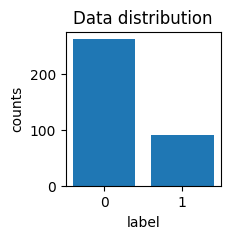

Train: x=(353, 10), y=(353, 1)
Test: x=(89, 10)


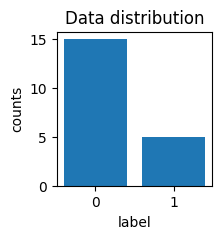

x_train: (333, 10) | y_train: (333, 1)
x_val: (20, 10) | y_val: (20, 1)


In [344]:
# load data
#data = np.load('/content/drive/MyDrive/basic_data.npz')
data = np.load('basic_data.npz')
X_train, Y_train = data["x_train"], data["y_train"]
X_test = data["x_test"]

# plot the data distribution
Y_train_1 = len(['_' for y in Y_train if y == 1])
Y_train_0 = len(['_' for y in Y_train if y == 0])
plt.figure(figsize=(2, 2))
plt.bar([0, 1], [Y_train_0, Y_train_1])
plt.title('Data distribution')
plt.xlabel('label')
plt.ylabel('counts')
plt.show()

print('Train: x=%s, y=%s' % (X_train.shape, Y_train.shape))
print('Test: x=%s' % (X_test.shape, ))

### START CODE HERE ###
# train_val split
n = X_train.shape[0]
val_size = 20
x_train, y_train = X_train[val_size:], Y_train[val_size:]
x_val, y_val = X_train[:val_size], Y_train[:val_size]
# plot the data distribution
y_val_1 = len(['_' for y in y_val if y == 1])
y_val_0 = len(['_' for y in y_val if y == 0])
plt.figure(figsize=(2, 2))
plt.bar([0, 1], [y_val_0, y_val_1])
plt.title('Data distribution')
plt.xlabel('label')
plt.ylabel('counts')
plt.show()
### END CODE HERE ###

print("x_train: " + str(x_train.shape) + " | y_train: " + str(y_train.shape))
print("x_val: " + str(x_val.shape) + " | y_val: " + str(y_val.shape))

## Training and Evaluation

Loss after iteration 0: 0.042984
Loss after iteration 1000: 0.036260


Loss after iteration 2000: 0.034758
Loss after iteration 3000: 0.033556
Loss after iteration 4000: 0.032464
Loss after iteration 5000: 0.031429
Loss after iteration 6000: 0.030426
Loss after iteration 7000: 0.029453
Loss after iteration 8000: 0.028554
Loss after iteration 9000: 0.027739
Loss after iteration 10000: 0.027016
Loss after iteration 11000: 0.026382
Loss after iteration 12000: 0.025842
Loss after iteration 13000: 0.025393
Loss after iteration 14000: 0.025012
Loss after iteration 15000: 0.024676
Loss after iteration 16000: 0.024373
Loss after iteration 17000: 0.024103
Loss after iteration 18000: 0.023879
Loss after iteration 19000: 0.023673
Loss after iteration 20000: 0.023484
Loss after iteration 21000: 0.023308
Loss after iteration 22000: 0.023144
Loss after iteration 23000: 0.022992
Loss after iteration 24000: 0.022856
Loss after iteration 25000: 0.022730
Loss after iteration 26000: 0.022601
Loss after iteration 27000: 0.022480
Loss after iteration 28000: 0.022361
Loss afte

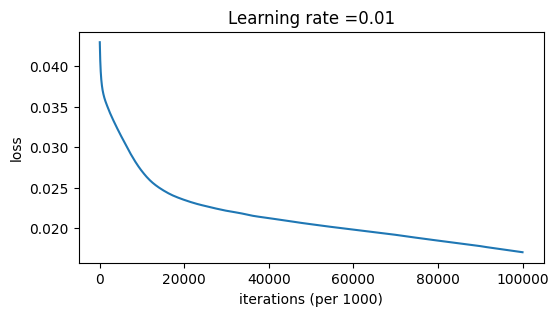

In [345]:
# GRADED CODE: binary classification
### START CODE HERE ###

loss_function = 'focal_loss'
if loss_function == 'cross_entropy':
    layers_dims = [10,10,10,10,1]
    activation_fn = ['relu','relu','relu','sigmoid']
    gamma = None        # you can leave this as it is
    alpha = None        # you can leave this as it is
    y_train_processed = y_train
    y_val_processed = y_val
    assert y_train_processed.shape[-1] == 1, "see the 'Note' in the Basic implementation section"
    assert y_val_processed.shape[-1] == 1, "see the 'Note' in the Basic implementation section"
elif loss_function == 'focal_loss':
    layers_dims = [10,10,10,10,2]
    activation_fn = ['relu','relu','relu','softmax']
    gamma = 2.0
    alpha = np.array([0.25,0.25])
    y_train_processed = np.array([[1,0] if y == 0 else [0,1] for y in y_train.reshape(-1)])
    y_val_processed = np.array([[1,0] if y == 0 else [0,1] for y in y_val.reshape(-1)])
    assert y_train_processed.shape[-1] == 2, "see the 'Note' in the Basic implementation section"
    assert y_val_processed.shape[-1] == 2, "see the 'Note' in the Basic implementation section"

learning_rate = 0.01
num_iterations = 100000
print_loss = True
print_freq = 1000
classes = 2
losses = []                         # keep track of loss
model = Model(layers_dims, activation_fn, loss_function, alpha, gamma)

# Loop (batch gradient descent)
for i in range(0, num_iterations):
    # forward
    AL = model.forward(x_train)

    # compute loss
    if loss_function == 'cross_entropy':
        loss = compute_BCE_loss(AL,y_train_processed)
    elif loss_function == 'focal_loss':
        loss =  compute_focal_loss(AL,y_train_processed,alpha,gamma)

    # backward
    dA_prev = model.backward(AL,y_train_processed)

    # update
    model.update(learning_rate)

    losses.append(loss)
    if print_loss and i % print_freq == 0:
        print ("Loss after iteration %i: %f" %(i, loss))

# plot the loss
plt.figure(figsize=(6, 3))
plt.plot(np.squeeze(losses))
plt.ylabel('loss')
plt.xlabel(f'iterations (per {print_freq})')
plt.title("Learning rate =" + str(learning_rate))
plt.show()
### END CODE HERE ###

In [346]:
print('training------')
pred_train = predict(x_train, y_train_processed, model)
print('validation------')
pred_val = predict(x_val, y_val_processed, model)

training------
Accuracy: 87.69%
f1_micro score for each class: [0.91881188 0.74534161]
f1_micro score average: 0.83
validation------
Accuracy: 90.00%
f1_micro score for each class: [0.92857143 0.83333333]
f1_micro score average: 0.88


In [347]:
pred_test = predict(X_test, None, model)
outputs["basic_pred_test"] = pred_test
outputs["basic_layers_dims"] = layers_dims
outputs["basic_activation_fn"] = activation_fn
outputs["basic_loss_function"] = loss_function
outputs["basic_alpha"] = alpha
outputs["basic_gamma"] = gamma
basic_model_parameters = []
for basic_linear in model.linear:
    basic_model_parameters.append(basic_linear.parameters)
outputs["basic_model_parameters"] = basic_model_parameters

# Advanced implementation (multi class classification) (15%)

In this section, you need to implement a multi-class classifier using the functions you had previously written. You will create a model that can classify ten handwritten digits. The MNIST handwritten digit classification problem is a standard dataset in computer vision and deep learning. We usually use convolutional deep-learning neural networks for image classification. However, using only dense layers appears to be enough to handle this simple dataset, and this is a good way to get started with image datasets.

**Exercise**: Implement a multi-class classifier and tune hyperparameter.

**Instruction**:
*   Use the functions you had previously written.
*   Preprocess the data to match the correct input format.
*   Use mini-batch gradient descent to train the model.

**Hint**:
For data preprocessing, please be careful with the dimension of the inputs (X and y) and also note that the values of images are usually integers that fall between 0 and 255. You need to change the data type into float and scale the values between 0 and 1.

In Batch Gradient Descent, we consider all the samples for every step of Gradient Descent. But what if our dataset is huge? You will get around 33000 training samples, then to take one step, the model will have to calculate the gradients of all the 33000 samples. This does not seem an efficient way. Hence, mini-batch gradient descent is recommended to be used in this part.

## Read data & train_val split

In [348]:
#from google.colab import drive
#drive.mount('/content/drive')

Train: X=(31065, 28, 28), Y=(31065,)
Test: X=(7767, 28, 28)


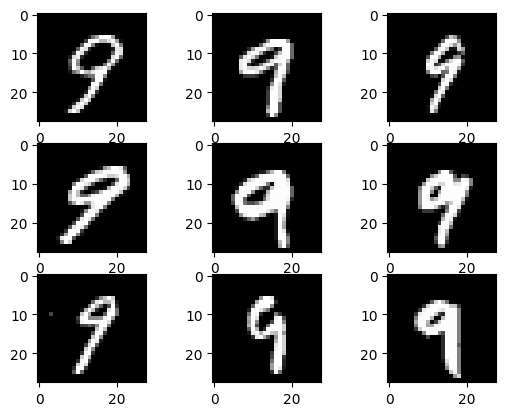

shape of X_train: (31065, 28, 28)
shape of Y_train: (31065, 10)
shape of X_test: (7767, 28, 28)

shape of X_train: (31065, 784)
shape of Y_train: (31065, 10)
shape of X_test: (7767, 784)


In [349]:
# load data
#data = np.load('/content/drive/MyDrive/advanced_data.npz')
data = np.load('advanced_data.npz')
X_train = data["x_train"]
Y_train = data["y_train"]
X_test = data["x_test"]

# summarize loaded dataset
print(f'Train: X={X_train.shape}, Y={Y_train.shape}')
print(f'Test: X={X_test.shape}')
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(X_train[i], cmap='gray', vmin=0, vmax=255)
# show the figure
plt.show()

# GRADED CODE: multi-class classification (Data preprocessing) one-hot encoding for y
### START CODE HERE ###
Y_train_r = Y_train
Y_train = np.eye(10)[Y_train]
### END CODE HERE ###

print("shape of X_train: " + str(X_train.shape))
print("shape of Y_train: " + str(Y_train.shape))
print("shape of X_test: " + str(X_test.shape))

# GRADED CODE: multi-class classification (Data preprocessing)	normalize x
### START CODE HERE ###
X_train = X_train.reshape(X_train.shape[0],784)
X_test = X_test.reshape(X_test.shape[0],784)

### END CODE HERE ###

print("\nshape of X_train: " + str(X_train.shape))
print("shape of Y_train: " + str(Y_train.shape))
print("shape of X_test: " + str(X_test.shape))

In [350]:
# You can split training and validation set here and visualize their distribution. (Optional)
# If not, just leave this as it is
### START CODE HERE ###
idx_arr = []
for i in range(10):
    idx_arr.append(np.where(Y_train_r==i)[0][:5*(10-i)])
idx_arr = np.concatenate(idx_arr)
x_val = X_train[idx_arr]
y_val = Y_train[idx_arr]
x_train = X_train[np.setdiff1d([i for i in range(len(X_train))], idx_arr)]
y_train = Y_train[np.setdiff1d([i for i in range(len(X_train))], idx_arr)]
print("shape of x_train: " + str(x_train.shape))
print("shape of y_train: " + str(y_train.shape))
print("shape of x_val: " + str(x_val.shape))
print("shape of y_val: " + str(y_val.shape))
### END CODE HERE ###



shape of x_train: (30790, 784)
shape of y_train: (30790, 10)
shape of x_val: (275, 784)
shape of y_val: (275, 10)


## Training and Evaluation

Loss after iteration 0: 0.284792
Loss after iteration 100: 0.036342
Loss after iteration 200: 0.030486
Loss after iteration 300: 0.026224
Loss after iteration 400: 0.023536
Loss after iteration 500: 0.021537
Loss after iteration 600: 0.020455
Loss after iteration 700: 0.019222
Loss after iteration 800: 0.018541
Loss after iteration 900: 0.017500
Loss after iteration 1000: 0.017517
Loss after iteration 1100: 0.017142
Loss after iteration 1200: 0.016384
Loss after iteration 1300: 0.016346
Loss after iteration 1400: 0.016473
Loss after iteration 1500: 0.016379
Loss after iteration 1600: 0.015408
Loss after iteration 1700: 0.015330
Loss after iteration 1800: 0.015112
Loss after iteration 1900: 0.014776
Loss after iteration 2000: 0.014722
Loss after iteration 2100: 0.014361
Loss after iteration 2200: 0.014413
Loss after iteration 2300: 0.014039
Loss after iteration 2400: 0.014672
Loss after iteration 2500: 0.014090
Loss after iteration 2600: 0.013750
Loss after iteration 2700: 0.013628
Loss

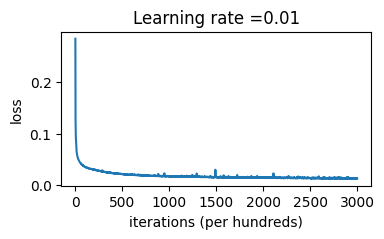

In [351]:
# GRADED CODE: multi-class classification
### START CODE HERE ###
def random_mini_batches(X, Y, mini_batch_size = 64):
    """
    Creates a list of random minibatches from (X, Y)

    Arguments:
    X -- input data, of shape (n, f^{0})
    Y -- true "label" vector, of shape (n, C)
    mini_batch_size -- size of the mini-batches, integer

    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """

    m = X.shape[0]                  # number of training examples
    mini_batches = []

    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[permutation]
    shuffled_Y = Y[permutation]

    # Step 2 - Partition (shuffled_X, shuffled_Y).
    # Cases with a complete mini batch size only i.e each of 64 examples.
    num_complete_minibatches = math.floor(m / mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        # (approx. 2 lines)
        mini_batch_X = shuffled_X[[i for i in range(k*64,(k+1)*64)]]
        mini_batch_Y = shuffled_Y[[i for i in range(k*64,(k+1)*64)]]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)

    # For handling the end case (last mini-batch < mini_batch_size i.e less than 64)
    if m % mini_batch_size != 0:
        #(approx. 2 lines)
        mini_batch_X = shuffled_X[[i for i in range(num_complete_minibatches*64,m)]]
        mini_batch_Y = shuffled_Y[[i for i in range(num_complete_minibatches*64,m)]]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)

    return mini_batches

layers_dims = [784,10,10,10,10,10,10]
activation_fn = ['relu','relu','relu','relu','relu','softmax']
learning_rate = 0.01
num_iterations = 3000
batch_size = 64
classes = 10
losses = []                         # keep track of loss
print_loss = True
print_freq = 100
loss_function = 'focal_loss'
gamma = 2.0
alpha = np.array([0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25])
model = Model(layers_dims, activation_fn, loss_function, alpha=alpha, gamma=gamma)

# Loop (gradient descent)
for i in range(0, num_iterations):
    mini_batches = random_mini_batches(x_train, y_train, batch_size)
    loss = 0
    for batch in mini_batches:
        x_batch, y_batch = batch

        # forward
        AL = model.forward(x_batch)

        # compute loss
        if loss_function == 'cross_entropy':
            loss += compute_CCE_loss(AL,y_batch)
        elif loss_function == 'focal_loss':
            loss += compute_focal_loss(AL,y_batch,alpha,gamma)

        # backward
        dA_prev = model.backward(AL,y_batch)
        # update
        model.update(learning_rate)

    loss /= len(mini_batches)
    losses.append(loss)
    if print_loss and i % print_freq == 0:
        print ("Loss after iteration %i: %f" %(i, loss))


# plot the loss
plt.figure(figsize=(4, 2))
plt.plot(np.squeeze(losses))
plt.ylabel('loss')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(learning_rate))
plt.show()
### END CODE HERE ###

In [352]:
pred_train = predict(x_train, y_train, model)

Accuracy: 96.03%
f1_micro score for each class: [0.98779822 0.9942837  0.96408655 0.92946276 0.96964035 0.91689111
 0.95538681 0.95309786 0.9057117  0.82567216]
f1_micro score average: 0.94


In [353]:
#You can check for your validation accuracy here. (Optional)
### START CODE HERE ###
pred_val = predict(x_val, y_val, model)
### END CODE HERE ###

Accuracy: 91.64%
f1_micro score for each class: [0.99009901 0.97777778 0.925      0.90410959 0.9        0.85714286
 0.82926829 0.88888889 0.77777778 0.72727273]
f1_micro score average: 0.88


In [354]:
pred_test = predict(X_test, None, model)
outputs["advanced_pred_test"] = pred_test
outputs["advanced_layers_dims"] = layers_dims
outputs["advanced_activation_fn"] = activation_fn
outputs["advanced_loss_function"] = loss_function
outputs["advanced_alpha"] = alpha
outputs["advanced_gamma"] = gamma
advanced_model_parameters = []
for advanced_linear in model.linear:
    advanced_model_parameters.append(advanced_linear.parameters)
outputs["advanced_model_parameters"] = advanced_model_parameters

# Submit prediction

In [355]:
# sanity check
assert list(outputs.keys()) == ['linear_forward',\
    'linear_backward',\
    'linear_update_parameters',\
    'sigmoid',\
    'relu',\
    'softmax',\
    'sigmoid_backward',\
    'relu_backward',\
    'softmax_CCE_backward',\
    'softmax_Focal_backward',\
    'model_forward_sigmoid',\
    'model_forward_relu',\
    'model_forward_softmax',\
    'model_backward_sigmoid',\
    'model_backward_relu',\
    'model_update_parameters',\
    'compute_BCE_loss',\
    'compute_CCE_loss',\
    'compute_focal_loss',\
    'basic_pred_test',\
    'basic_layers_dims',\
    'basic_activation_fn',\
    'basic_loss_function',\
    'basic_alpha',\
    'basic_gamma',\
    'basic_model_parameters',\
    'advanced_pred_test',\
    'advanced_layers_dims',\
    'advanced_activation_fn',\
    'advanced_loss_function',\
    'advanced_alpha',\
    'advanced_gamma',\
    'advanced_model_parameters'],\
"You're missing something, please restart the kernel and run the code from begining to the end. If the same error occurs, maybe you deleted some outputs, check the template to find the missing parts!"

In [356]:
np.save("output.npy", outputs)

In [357]:
# sanity check
submit = np.load("output.npy", allow_pickle=True).item()
for key, value in submit.items():
  print(str(key) + "： " + str(type(value)))

linear_forward： <class 'tuple'>
linear_backward： <class 'tuple'>
linear_update_parameters： <class 'dict'>
sigmoid： <class 'tuple'>
relu： <class 'tuple'>
softmax： <class 'tuple'>
sigmoid_backward： <class 'numpy.ndarray'>
relu_backward： <class 'numpy.ndarray'>
softmax_CCE_backward： <class 'numpy.ndarray'>
softmax_Focal_backward： <class 'numpy.ndarray'>
model_forward_sigmoid： <class 'tuple'>
model_forward_relu： <class 'tuple'>
model_forward_softmax： <class 'tuple'>
model_backward_sigmoid： <class 'tuple'>
model_backward_relu： <class 'tuple'>
model_update_parameters： <class 'dict'>
compute_BCE_loss： <class 'numpy.float64'>
compute_CCE_loss： <class 'numpy.float64'>
compute_focal_loss： <class 'numpy.float64'>
basic_pred_test： <class 'numpy.ndarray'>
basic_layers_dims： <class 'list'>
basic_activation_fn： <class 'list'>
basic_loss_function： <class 'str'>
basic_alpha： <class 'numpy.ndarray'>
basic_gamma： <class 'float'>
basic_model_parameters： <class 'list'>
advanced_pred_test： <class 'numpy.nda

**Notice**: We will not check the data type after "compute_focal_loss", (since you might be using focal loss in basic, then your basic_alpha wouldn't be None), so it is fine if you have different data type after "compute_focal_loss".

Expected output: <br>
<small>
linear_forward： <class 'tuple'> <br>
linear_backward： <class 'tuple'> <br>
linear_update_parameters： <class 'dict'> <br>
sigmoid： <class 'tuple'> <br>
relu： <class 'tuple'> <br>
softmax： <class 'tuple'> <br>
sigmoid_backward： <class 'numpy.ndarray'> <br>
relu_backward： <class 'numpy.ndarray'> <br>
softmax_CCE_backward： <class 'numpy.ndarray'> <br>
softmax_Focal_backward： <class 'numpy.ndarray'> <br>
model_forward_sigmoid： <class 'tuple'> <br>
model_forward_relu： <class 'tuple'> <br>
model_forward_softmax： <class 'tuple'> <br>
model_backward_sigmoid： <class 'tuple'> <br>
model_backward_relu： <class 'tuple'> <br>
model_update_parameters： <class 'dict'> <br>
compute_BCE_loss： <class 'numpy.float64'> <br>
compute_CCE_loss： <class 'numpy.float64'> <br>
compute_focal_loss： <class 'numpy.float64'> <br>
basic_pred_val： <class 'numpy.ndarray'> <br>
basic_layers_dims： <class 'list'> <br>
basic_activation_fn： <class 'list'> <br>
basic_loss_function： <class 'str'> <br>
basic_alpha： <class 'NoneType'> <br>
basic_gamma： <class 'NoneType'> <br>
basic_model_parameters： <class 'list'> <br>
advanced_pred_test： <class 'numpy.ndarray'> <br>
advanced_layers_dims： <class 'list'> <br>
advanced_activation_fn： <class 'list'> <br>
advanced_loss_function： <class 'str'> <br>
advanced_alpha： <class 'numpy.ndarray'> <br>
advanced_gamma： <class 'float'> <br>
advanced_model_parameters： <class 'list'> <br>
</small>